In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ("dark_background")

In [6]:
file_path = '../../less_7/data/processed_data.csv'
df = pd.read_csv(file_path, sep=',')
df

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
0,id2875421,1,930.399753,0,1.500479,6.122493
1,id2377394,0,930.399753,0,1.807119,6.498282
2,id3858529,1,930.399753,0,6.392080,7.661527
3,id3504673,1,930.399753,0,1.487155,6.063785
4,id2181028,1,930.399753,0,1.189925,6.077642
...,...,...,...,...,...,...
1458639,id2376096,1,1053.529749,0,1.226296,6.658011
1458640,id1049543,0,930.399753,0,6.056935,6.486161
1458641,id2304944,1,930.399753,0,7.832952,6.639876
1458642,id2714485,0,930.399753,0,1.093786,5.924256


In [7]:
# Заполнение пропусков
gen = df.groupby('log_trip_duration')['distance_km'].transform('mean').to_frame()
orig = df['distance_km'].to_frame()

concated = pd.concat([gen, orig], axis=1)
concated.columns = ['gen_distance_km', 'orig_distance_km']
concated

,gen_distance_km,orig_distance_km
0,1.672162,1.500479
1,2.366328,1.807119
2,10.348497,6.392080
3,1.581824,1.487155
4,1.638725,1.189925
...,...,...
1458639,2.841926,1.226296
1458640,2.413773,6.056935
1458641,2.854360,7.832952
1458642,1.411838,1.093786


array([[<Axes: title={'center': 'vendor_id'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'store_and_fwd_flag'}>,
        <Axes: title={'center': 'distance_km'}>],
       [<Axes: title={'center': 'log_trip_duration'}>, <Axes: >]],
      dtype=object)

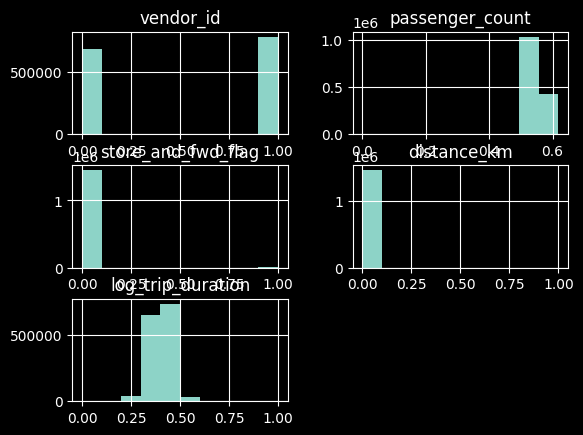

In [22]:
# Нахождение выбросов и борба с ними

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df.drop(columns=['id'], axis=1))
df_scaled = pd.DataFrame(scaled_data, columns=df.drop(columns=['id'], axis=1).columns)

df_scaled[df_scaled['passenger_count'] < 1.0].hist(bins=int(df_scaled['passenger_count'].nunique()))


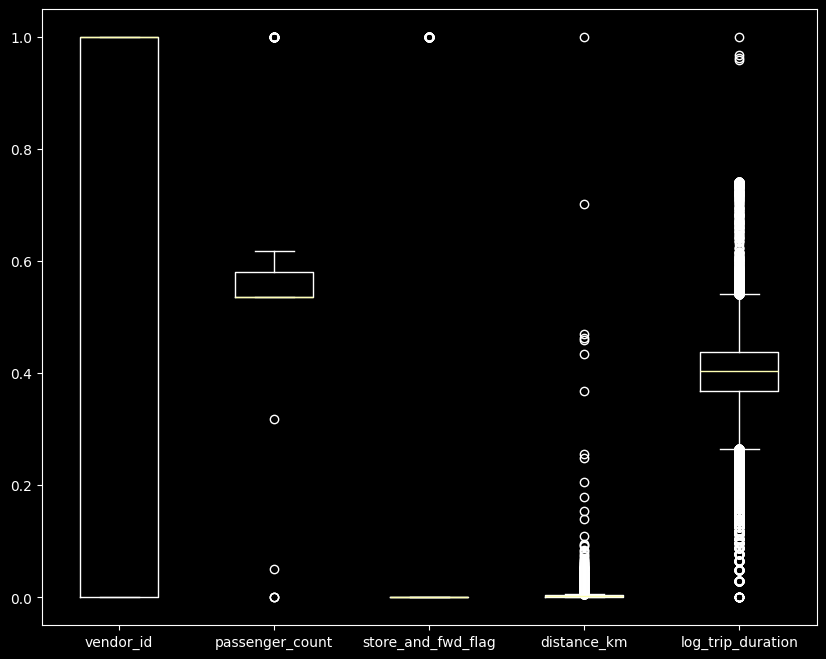

In [25]:
labels = df_scaled.columns

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.boxplot(df_scaled.values)
plt.xticks(range(1, 6), labels)

plt.show()


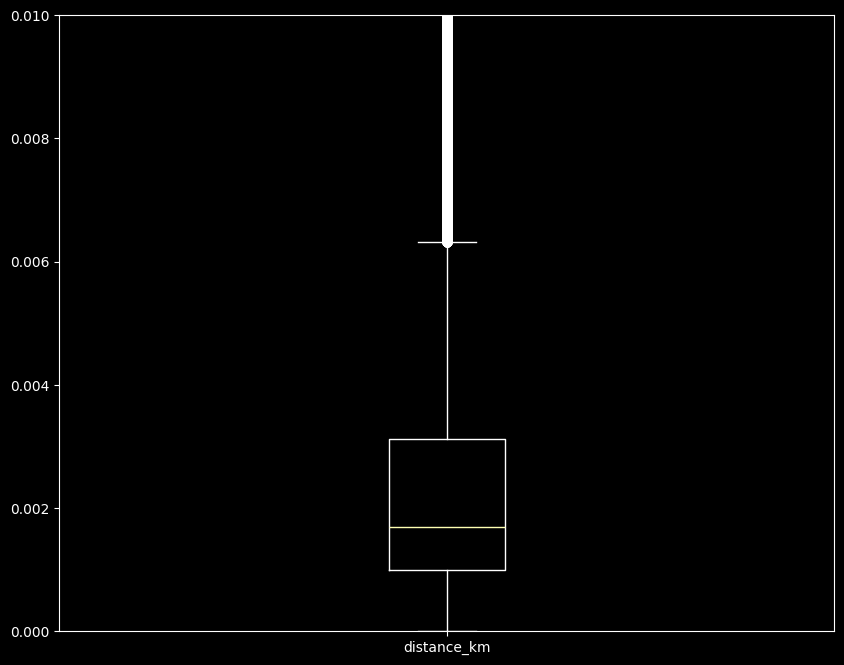

In [37]:
labels = ['distance_km']

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.boxplot(df_scaled[labels].values)  # передаем данные в виде массива values
plt.xticks(range(1, 2), labels)  # устанавливаем подписи оси x
plt.ylim(0, 0.01)
plt.show()


In [45]:
# Рассчитываем длину ящика
q_high = df['distance_km'].quantile(0.75)
q_low = df['distance_km'].quantile(0.25)
tentacle_length = q_high - q_low
tentacle_length

2.6465033402410656

In [53]:
# Рассчитываем длину усиков
upper_tentacle = q_high + 3 * tentacle_length
lower_tentacle = q_low + 1.5 * tentacle_length

In [54]:
df.shape

(1458644, 6)

In [55]:
df_cleaned = df[df['distance_km'] < upper_tentacle]
df_cleaned.shape

(1393200, 6)